# CAR DATA

Project to practice about EDA, Univariate and bivariate, clean data, and Lineal Regression

## About Dataset
There is an automobile company XYZ from India which aspires to enter the Indian used-car market by setting up their company locally to give competition to their counterparts.

Data Dictionary:
<br>Description
<br>**Sales_ID**: Sales ID
<br>**name**: Name of the brand of the used car
<br>**year**: Year of the car purchase
<br>**selling_price**: Current sellling price for used car
<br>**km_driven**: Total km driven
<br>**Region**: Region where it is used
<br>**State** or Province: State or Province where it is used
<br>**City**: City where it is used
<br>**fuel**: Fuel type
<br>**seller_type**: Who is selling the car
<br>**transmission**: Transmission type of the car
<br>**owner**: Owner type
<br>**mileage**: Mileage of the car
<br>**engine**: engine power
<br>**max_power**: max power
<br>**seats**: Number of seats
<br>**sold**: used car sold or not


Link
https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?datasetId=2264727&sortBy=voteCount&select=UserCarData.csv

In [155]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from scipy import stats


Importing dataset from local file

In [109]:
df = pd.read_csv("UserCarData.csv")

In [110]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


# EDA

In [111]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7906
Number of columns: 18


The file has 7906 registers and 18 variables

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

The dataset doesn't has any null values.

Cuantitative columns:

Sales_ID, year, selling_price, km_driven, mileage, engine, seats.

Cualitative columns:

name, Region, Sate or Province, City, fuel, seller_type, transmission, owner, torque, sold

### General description of the dataset 
We can see the different values in the dataset for each column after execute `describe()`, such as the mean, min and max values.


In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.00,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
mileage,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0


In [114]:
col_object = ['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'torque', 'sold']
print("Unique Values: ")
for element in col_object:
    valores_unicos = pd.unique(df[element])
    if len(valores_unicos) > 50:
        print(f"{element}: count {len(valores_unicos)} {valores_unicos[:10]} first values")
    else:
        print(f"{element}: count {len(valores_unicos)}, {valores_unicos}")


Unique Values: 
name: count 31, ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Region: count 4, ['East' 'Central' 'West' 'South']
State or Province: count 49, ['District of Columbia' 'New York' 'Illinois' 'California' 'Texas'
 'Massachusetts' 'Washington' 'Georgia' 'North Carolina' 'Florida'
 'Pennsylvania' 'Michigan' 'Iowa' 'Oregon' 'New Mexico' 'Maryland'
 'Montana' 'Arkansas' 'Arizona' 'Maine' 'Vermont' 'New Jersey'
 'Connecticut' 'Oklahoma' 'Tennessee' 'Alabama' 'Wisconsin'
 'South Carolina' 'New Hampshire' 'Idaho' 'Minnesota' 'Ohio' 'Kansas'
 'Utah' 'Virginia' 'Nebraska' 'West Virginia' 'Colorado' 'Indiana'
 'Kentucky' 'Missouri' 'North Dakota' 'Rhode Island' 'Louisiana' 'Wyoming'
 'Nevada' 'Mississippi' 'Delaware' 'South Dakota']
City: count 1310 ['Washingt

In two columns there are a lot of unique values like 'City' with 1310 and 'torque' with 441 values.  from the 'torque' variable we can split the values, this will we for the future process. 
The 'City' and 'State' columns may add some information but at this time and for learning purpose we will skip.

## Clean dataset

Drop some columns due to the analisys. These columns will not take part for future process due to the lot of unique values.

In [115]:
df_1 = df.drop(columns=['Sales_ID', 'State or Province', 'City'], axis=1)

In [116]:
df_1.head()

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,Skoda,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,Honda,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,Hyundai,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,Maruti,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


Transformation of torque

I decide to split the value of torque in 'Nm' and RPM in the middle there are other values in the unit measure of kgm but this will be converted

In [117]:
import re

df_aux = df_1.copy()
def get_first_value_split(element, match):
    first_value = None
    if match in element:
        first_value = float(element.split(match)[0])
    return first_value

def extract_Nm_value(row):
    first = None
    second = None
    cont = 0
    list_separators = ['@', 'at', '/']
    list_matches = ['Nm', 'nm', 'NM', 'KGM', 'kgm']
    #print(row)
    for separator in list_separators:
        if separator in row:
            first, second = row.split(separator, 1)
            # working with the first split
            for match in list_matches:
                number_value = get_first_value_split(first, match)
                if number_value:
                    if 'KGM' in match  or 'kgm' in match:
                        number_value = number_value * 9.81
                    return number_value
                else:
                    #working with the second split
                    if match in second:
                        if 'KGM' in match  or 'kgm' in match:
                            number_value = float(first) * 9.81
                        else:
                            number_value = float(first)
                        return number_value
        else:
            cont += 1
            if cont == 3:
                for match in list_matches:
                    number_value = get_first_value_split(row, match)
                    if number_value:
                        if 'KGM' in match  or 'kgm' in match:
                            number_value = number_value * 9.81
                        return number_value


def extract_rpm_value(row):
    list_separators = ['@', 'at', '/']
    # extract the RPM value
    for separator in list_separators:
        if separator in row:
            _ , second = row.split(separator, 1)
            re_matches = r"\d+(?:,\d+)?(?:\.\d+)?(?:-\d+(?:,\d+)?(?:\.\d+)?)?"
            value = re.findall(re_matches, second)[0]
            return value

list_Nm = [extract_Nm_value(x) for x in df_aux['torque']]
list_RPM = [extract_rpm_value(x) for x in df_aux['torque']]

list_Nm will contained numeric values, although list_RPM has a range of RPM, this is a string values 

In [118]:
unique_values_RPM = set(list_RPM)
print(f"list_RPM: unique values {len(list(unique_values_RPM))}, {unique_values_RPM}")

list_RPM: unique values 150, {'1,800-2,800', '4,400', '1200-1400', '1440-1500', '2750', '1400-2600', '1500-4500', '4750', '1500-2250', '1500-1800', '1600-2400', '1800-2800', '1,800', '4400', None, '1600-2000', '2250', '1700-4500', '1600-2500', '1500-2750', '4100', '3800', '1250-4000', '21,800', '3400', '2,600', '1750-2250', '2000-3500', '2400-2800', '1000-2500', '1250-5300', '1400-3400', '1700-2700', '1500-3000', '1600-3600', '3600-5200', '1600-2800', '1500', '1900', '1740', '1750', '2000-3000', '2,000-2,750', '3300', '4250', '2700', '3500', '4,100', '3000-4300', '5000', '1800-3250', '1350-4600', '2,000-2,680', '1800-3000', '1500-2500', '4386', '4,800', '3,500-4,500', '1800-2500', '3700', '1,900', '1,750-4,600', '4,500', '1400-4100', '4000', '2000', '4,250', '4388', '3750-3800', '1,700-2,200', '1500-4100', '4800', '3,000', '3600', '1750-3250', '1200-3600', '3,750', '1850', '1600-3200', '1200-4000', '1500-2800', '1,500-3,000', '1400-4500', '1700-2200', '1800-2200', '4850', '4,700', '100

list_RPM: There are a lot of values for this category column, this may not help to the process. I will create a new dataset skipping this variable.

In [119]:
df_2 = df_1.copy()
df_2['Nm'] = list_Nm
df_2 = df_2.drop('torque', axis=1)
df_2.head(5)

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Nm
0,Maruti,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,Y,190.000
1,Skoda,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,Y,250.000
2,Honda,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5,Y,124.587
3,Hyundai,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5,Y,219.744
4,Maruti,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5,Y,112.815


In [120]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   Region         7906 non-null   object 
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   int64  
 11  max_power      7906 non-null   float64
 12  seats          7906 non-null   int64  
 13  sold           7906 non-null   object 
 14  Nm             7894 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 926.6+ KB


In [121]:
df_2.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
Region            0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
sold              0
Nm               12
dtype: int64

There are twelve null values in Nm, but for this ocassion I will continue without a modification

## Analisys Univariate  

### Cuantitative variables

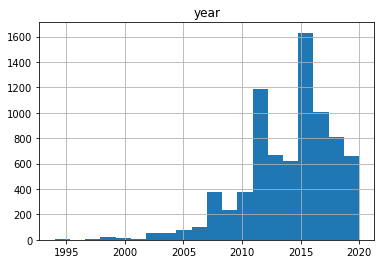

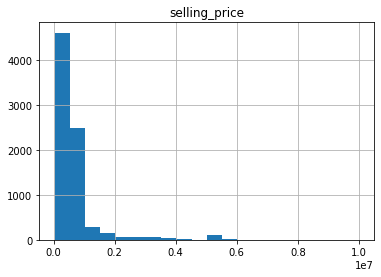

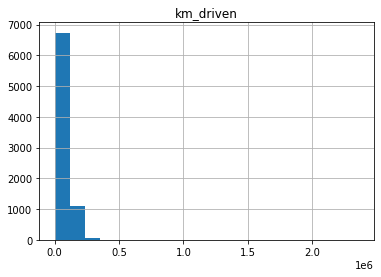

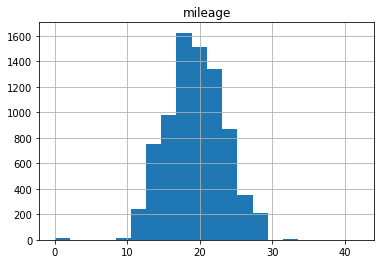

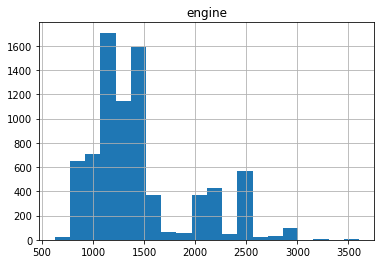

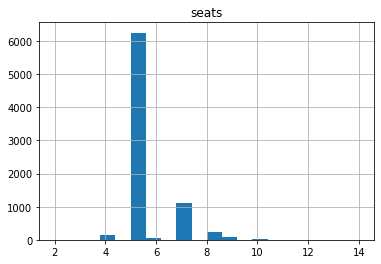

In [122]:
cuantitative_columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'seats']
#df.hist(bins=10, figsize=(20,15), colorbar=False)
# bins=10, figsize=(20,15), colorbar=False
for element in cuantitative_columns:
    df.hist(column=[element] ,bins=20)

From this graph we can see the cuantities for each numeric column. 
The column 'Sales_ID' must be ingnored due to the relation in the database record, it doesn't add information from the car.

Year: Most the the values are increasing after 2010

selling_price: this graph has another relation in x, refers to 1e7, this means we have to multiply the value in x for 10000000. It contains high values.

km_driven: In this chart we also have to multiply the value in x to obtain the real value, in this case for 1e6

mileage: the values of this graph can be similar to a normal graph, the central value it's 20. 

engine: most of the values are up to 1500.

max_power, most of the cars has between 50 until 100.

seats: there are lot of cars between 5 seats.



### Cualitatives variables

/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10446/1252164933.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i

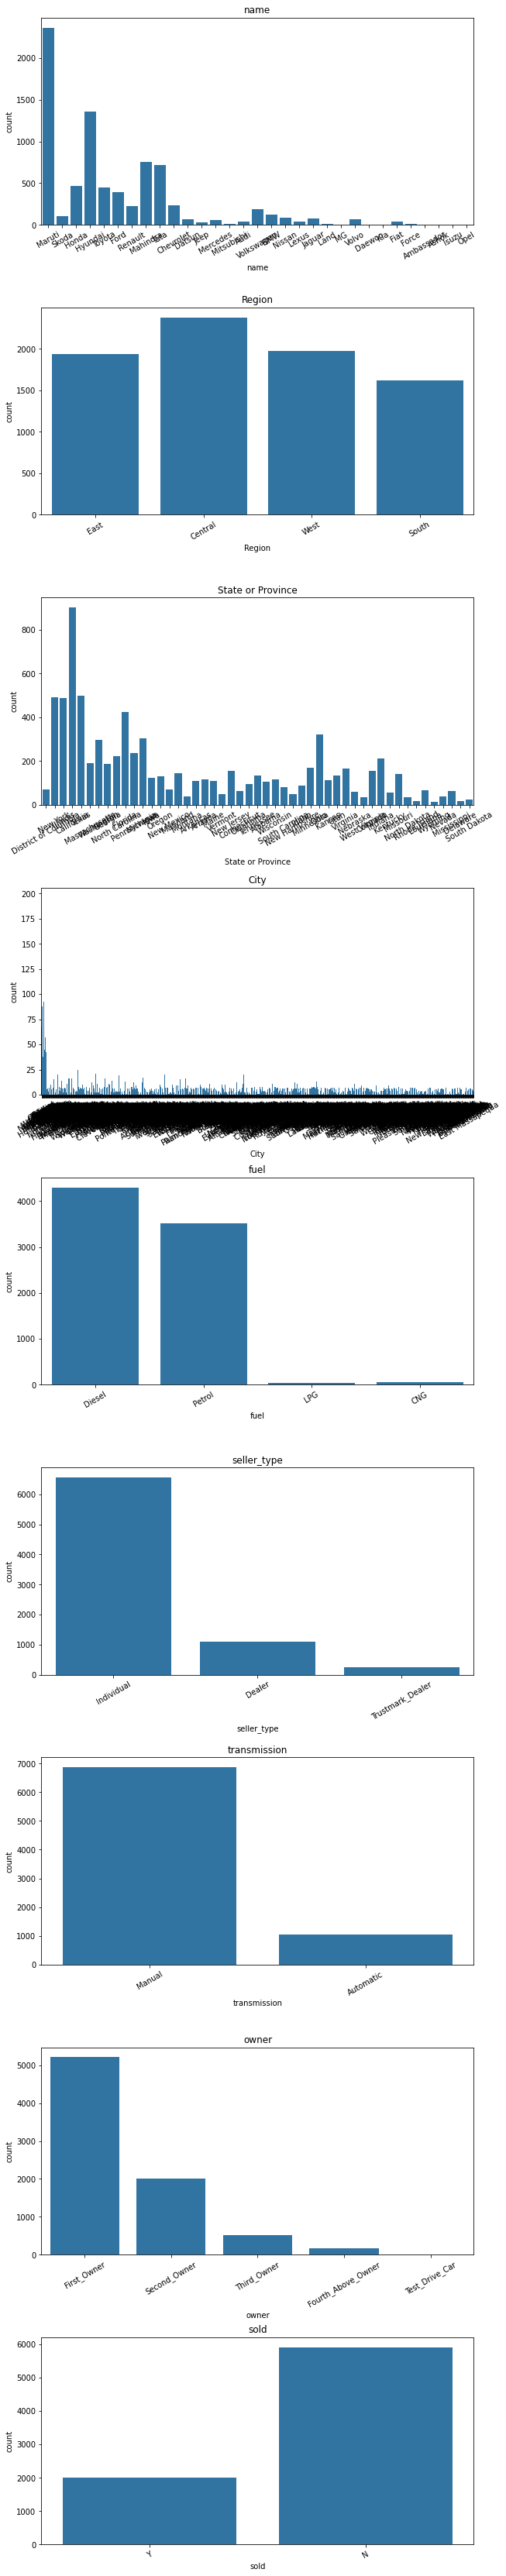

In [123]:
col_object = ['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'sold']

fig , ax = plt.subplots(nrows=len(col_object), ncols=1, figsize=(10,60))

fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(col_object):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


name: 'Maruti' and 'Hyundai' are the brands most repetead in the cars.

Region: 'Central' has more repetition but there isn't a lot of differences between the four regions

State or Province: There are a lot of values and may not be add more information for this moment I will 
skip this variable for future process 

City: There are a lot of values are more specific but I wll skip this variable for future process

fuel: 'Diesel' is the value most repetead for this item, almost the half of the dataset has it, then continues 'Petrol', this two elements are almost all the dataset.

seller_type: 'Individual' has almost 7 thousand of repetition.

transmission: 'Manual' has almost 7 thousand of repetition, most of the cars in the dataset has it

owner: 'First owner' is the value most repeat this mean that most of the seller try to publish their firt car

sold: Most of the cars hasn't been sold

## Bivariate analisys

/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


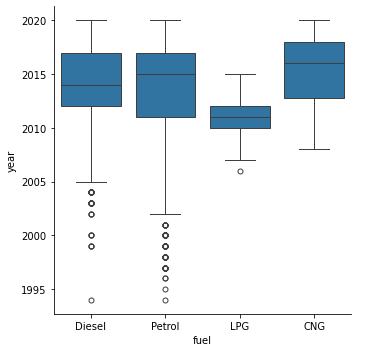

In [129]:
sns.catplot(data=df_1, x='fuel', y='year', kind='box')

Through the years we can see that old cars used to use petrol fuel, then diesel, for a short period of time LPG and nowdays there is CNG fuel competiting with the first two.

/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pari/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tigh

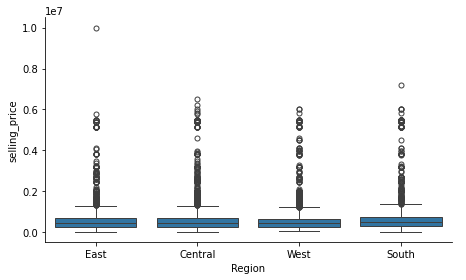

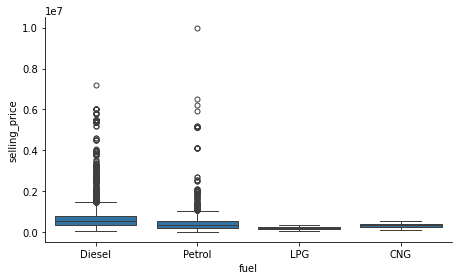

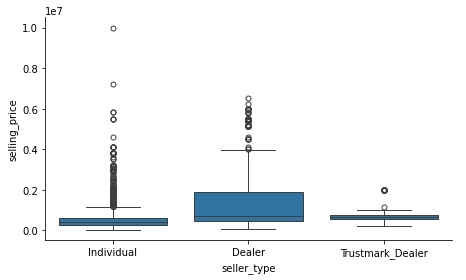

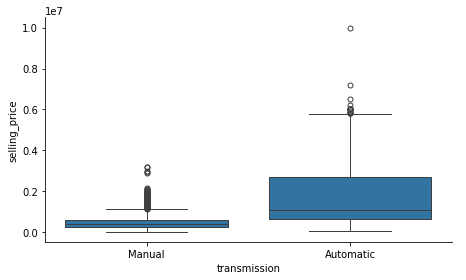

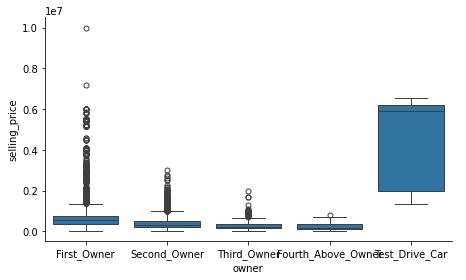

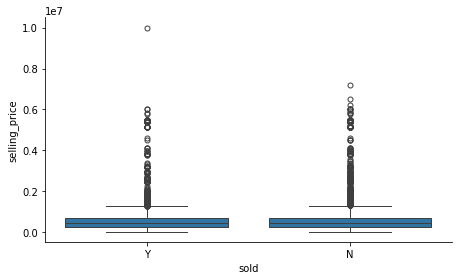

In [147]:
col_categories = ['Region', 'fuel', 'seller_type', 'transmission', 'owner', 'sold']

for i, col in enumerate(col_categories):
    sns.catplot(data=df_1, x=col, y='selling_price', kind='box', height= 4, aspect=1.6)

'Region': There isn't a differences between the regions and the selling_price.

'fuel': In the case of diesel, petrol we can see there are lot of cars with high prices, and the most exensive car has petrol fuel.

'seller_type': The individual sellers has the most expensive cars, besides the dieler and trustmark_diler.

'transmission': The cars with manual transmission has the least expensive cars, and the mean of the  automatic cars are higher that the first.  And the expensive prices  

'owner': The most exensive are with the first owner, this also could be due to the devaluation of the car through the years.

<Axes: xlabel='year', ylabel='selling_price'>

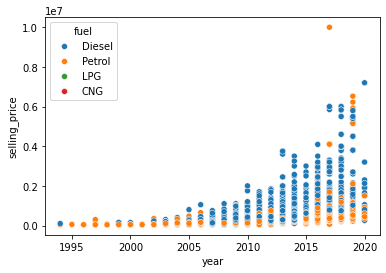

In [159]:
sns.scatterplot(y="selling_price", x="year", data=df_2, hue="fuel")


<Axes: xlabel='km_driven', ylabel='selling_price'>

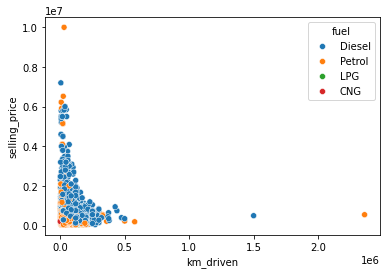

In [132]:
sns.scatterplot(y="selling_price", x="km_driven", data=df_2, hue="fuel")

<Axes: xlabel='mileage', ylabel='selling_price'>

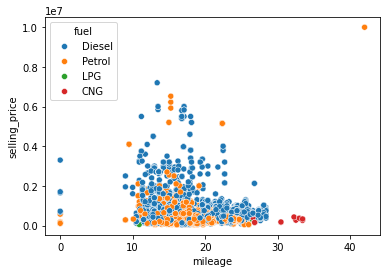

In [133]:
sns.scatterplot(y="selling_price", x="mileage", data=df_2, hue="fuel")

<Axes: xlabel='engine', ylabel='selling_price'>

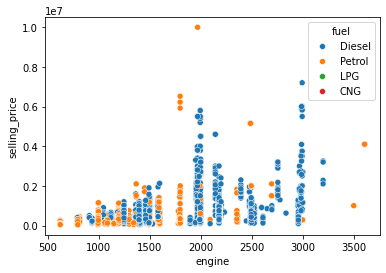

In [134]:
sns.scatterplot(y="selling_price", x="engine", data=df_2, hue="fuel")

<Axes: xlabel='seats', ylabel='selling_price'>

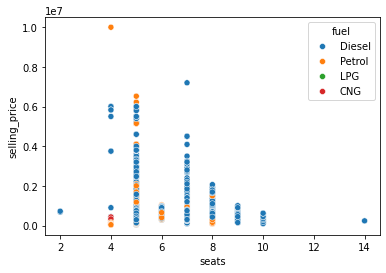

In [135]:
sns.scatterplot(y="selling_price", x="seats", data=df_2, hue="fuel")

<Axes: xlabel='Nm', ylabel='selling_price'>

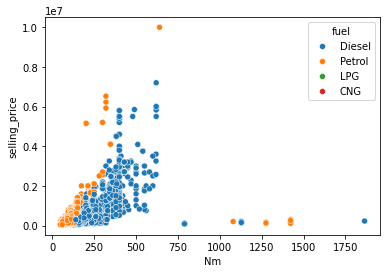

In [161]:
sns.scatterplot(y="selling_price", x="Nm", data=df_2, hue="fuel")


In the above graphs there isn't a direct relation with selling price

In [160]:
print(cuantitative_columns)

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'seats']


## Convertion

To start with the correlation it will be useful to transform string values into numeric   

In [136]:
# Encode name and torque
columns_to_label = ['name']
label_encoder = LabelEncoder()
# Ajustar y transformar los datos
df_encoded = df_2.copy()
for element in columns_to_label:
    label_encoded = label_encoder.fit_transform(df_2[element])
    df_encoded[element] = label_encoded
df_encoded.head()

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Nm
0,20,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,Y,190.000
1,26,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,Y,250.000
2,10,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5,Y,124.587
3,11,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5,Y,219.744
4,20,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5,Y,112.815


In [137]:
dummy_columns = col_object = ['Region', 'fuel', 'seller_type', 'transmission', 'owner', 'sold']
df_encoded = pd.get_dummies(df_encoded, columns=dummy_columns)
df_3 = df_encoded.copy()


# Correlation


<Axes: >

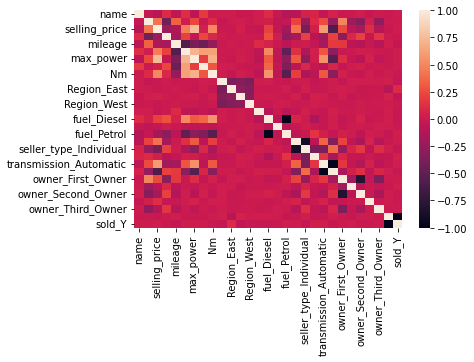

In [138]:
sns.heatmap(df_3.corr())


Text(0.5, 1.0, 'Features Correlating with Selling price')

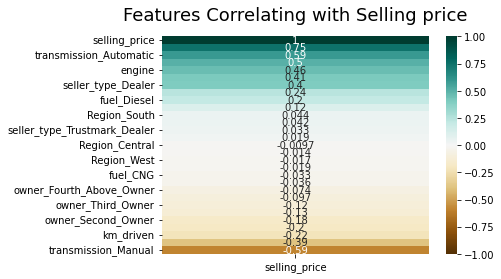

In [139]:
heatmap = sns.heatmap(
    df_3.corr()[['selling_price']].sort_values(
        by='selling_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling price', fontdict={'fontsize':18}, pad=16)

¿Existe algún sesgo en los datos recogidos?
¿Hay errores en la codificación de los datos?
¿Cómo se sintetiza y presenta la información contenida en un conjunto de datos?
¿Existen datos atípicos? ¿Cuáles son? ¿Cómo tratarlos?
¿Hay datos ausentes? ¿Tienen algún patrón sistemático? ¿Cómo tratarlos?